## Testing Tensorflow  (2.0)

Installing with anaconda [tensorflow](https://www.tensorflow.org/install/install_linux#InstallingAnaconda)


In [ ]:
import tensorflow as tf
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

TensorFlow 2.0 Hello World


In [ ]:
tf.__version__

'2.8.0'

## [LeNet-5  in TensorFlow with NMIST dataset]

Based in [tensorflow sample](https://www.tensorflow.org/tutorials/layers) and [UDACITY](htttp://www.udacity.com) deep learning classes.

A Guide to TF Layers: Building a Convolutional Neural Network

The TensorFlow layers module provides a high-level API that makes it easy to construct a neural network. It provides methods that facilitate the creation of dense (fully connected) layers and convolutional layers, adding activation functions, and applying dropout regularization. In this tutorial, we gonna build a convolutional neural network model to recognize the handwritten digits in the MNIST data set.

handwritten digits 0–9 from the MNIST data set

The MNIST dataset comprises 60,000 training examples and 10,000 test examples of the handwritten digits 0–9, formatted as 28x28-pixel monochrome images.





### Load data

11501568/11490434 [==============================] - 0s 0us/step
Train data: X=(60000, 28, 28), y=(60000,)
Test data: X=(10000, 28, 28), y=(10000,)


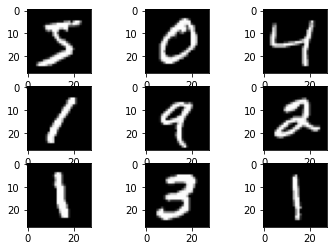

In [ ]:

from keras.datasets import mnist
import matplotlib.pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train data: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test data: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
trainy[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

### Prepare data


In [ ]:
from tensorflow.keras.utils import to_categorical


def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train):
	# convert from integers to floats
	train_norm = train.astype('float32')
	# normalize to range 0-1
	norm_image = train_norm / 255.0
	# quisiera pasarla a blanco y negro o cambiar la representacion de color
	# filtro previo (ecualizador de histrograma)
	# return normalized images
	return norm_image

	# load dataset
trainX, trainY, testX, testY = load_dataset()


	# prepare pixel data
trainX = prep_pixels(trainX)
testX = prep_pixels(testX)

# Reserve 10,000 samples for validation
x_val = trainX[-10000:]  
y_val = trainY[-10000:]
x_train = trainX[:-10000]
y_train = trainY[:-10000]

In [ ]:
testY[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Model


Building the CNN MNIST Classifier

Let's build a model to classify the images in the MNIST dataset using the following CNN architecture:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 16 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization (probability that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


![texto alternativo](https://https://miro.medium.com/max/1400/0*H9_eGAtkQXJXtkoK)


In [ ]:
# Parameters
learning_rate = 0.00001  # alpha de algoritmo del gradiente

# Network Parameters
input_shape=(28, 28, 1)
n_classes = 10  # MNIST total classes (0-9 digits)


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
  model.add(Conv2D(16, kernel_size=(5, 5), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(units=120, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(units=84, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_classes, activation='softmax'))
	# compile model
  # cual algoritmo del gradiente utilizar
  opt = SGD(lr=learning_rate, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model=define_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        12816     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


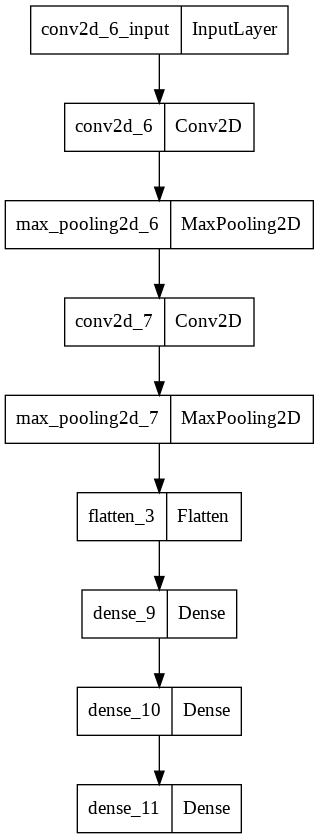

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

You are invited to draw a better representation [StackExchange](https://datascience.stackexchange.com/questions/14899/how-to-draw-deep-learning-network-architecture-diagrams)

In [ ]:
!pip3 install keras-visualizer

In [ ]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)

### Training variables

In [ ]:
epochs = 50  # more epochs better
batch_size =128 # normally in 2^n values
# fit model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,validation_data=(x_val, y_val))
print('\nhistory dict:', history.history)

Epoch 1/50
391/391 [==============================] - 6s 14ms/step - loss: 1.1242 - accuracy: 0.7281 - val_loss: 1.0404 - val_accuracy: 0.7569
Epoch 2/50
391/391 [==============================] - 4s 11ms/step - loss: 1.0414 - accuracy: 0.7459 - val_loss: 0.9611 - val_accuracy: 0.7768
Epoch 3/50
391/391 [==============================] - 4s 11ms/step - loss: 0.9689 - accuracy: 0.7633 - val_loss: 0.8923 - val_accuracy: 0.7950
Epoch 4/50
391/391 [==============================] - 4s 11ms/step - loss: 0.9052 - accuracy: 0.7780 - val_loss: 0.8317 - val_accuracy: 0.8092
Epoch 5/50
391/391 [==============================] - 4s 11ms/step - loss: 0.8492 - accuracy: 0.7908 - val_loss: 0.7787 - val_accuracy: 0.8199
Epoch 6/50
391/391 [==============================] - 4s 11ms/step - loss: 0.8000 - accuracy: 0.8028 - val_loss: 0.7322 - val_accuracy: 0.8305
Epoch 7/50
391/391 [==============================] - 4s 11ms/step - loss: 0.7566 - accuracy: 0.8113 - val_loss: 0.6913 - val_accuracy: 0.8393

We use a loss function to determine how far the predicted values deviate from the actual values in the training data

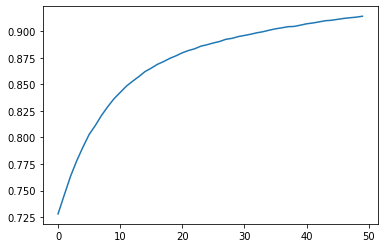

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])


### validate the model


In [ ]:
model.save('final_model.h5')
results = model.evaluate(testX, testY)

print('test loss, test acc:', results)

predictY=model.predict(testX)


313/313 [==============================] - 1s 4ms/step - loss: 0.2824 - accuracy: 0.9179
test loss, test acc: [0.2824491858482361, 0.917900025844574]


In [ ]:
import numpy as np
from sklearn.metrics import  classification_report

print(classification_report(np.argmax(testY,axis=1),np.argmax(predictY,axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.93      0.78       980
           1       0.81      0.95      0.88      1135
           2       0.69      0.55      0.61      1032
           3       0.59      0.80      0.68      1010
           4       0.68      0.38      0.48       982
           5       0.59      0.34      0.43       892
           6       0.57      0.71      0.63       958
           7       0.71      0.75      0.73      1028
           8       0.38      0.44      0.41       974
           9       0.42      0.27      0.33      1009

    accuracy                           0.62     10000
   macro avg       0.61      0.61      0.60     10000
weighted avg       0.61      0.62      0.60     10000



### Predict a value

[[2.8e-04 1.4e-05 2.7e-04 9.7e-01 7.7e-06 2.8e-02 4.2e-06 4.0e-04 3.7e-03
  3.3e-04]]
predicted value 3
expected value 3


Text(0.5, 1.0, 'image #4770 : 3')

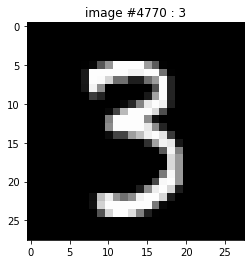

In [ ]:
import numpy as np

np.set_printoptions(1)
# select a random sample of the test data
num=np.random.randint(testX.shape[0])



predictions = model.predict(testX[num].reshape(1,28,28,1))
print(predictions)
print("predicted value",np.argmax(predictions))

# comparing the result
print("expected value",np.argmax(testY[num]))

plt.imshow(testX[num].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title('image #'+str(num)+" : "+str(np.argmax(testY[num])))

### load the model and predict

In [ ]:

from tensorflow.keras.models import load_model

new_model=load_model('final_model.h5')



### Testing

We are going to augment the data translating the image form center,rotating or applying a zoom.

This can be made by hand with [opencv](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)



In [ ]:
import numpy as np
import cv2
import random
def play_with_image(img):
            op=['trans -','trans +','rot -','rot +','zoom +']
            rows,cols,c = img.shape
            l=random.randint(0, 4)
            if(l==0): # translate between -5 -1
                x=random.randint(-5, -1)
                y=random.randint(-5, -1)
                M = np.float32([[1,0,x],[0,1,y]])
                new_img = cv2.warpAffine(img,M,(cols,rows))
            elif(l==1): # translate between 1 5
                x=random.randint(1, 5)
                y=random.randint(1, 5)
                M = np.float32([[1,0,x],[0,1,y]])
                new_img = cv2.warpAffine(img,M,(cols,rows))
            elif(l==2): # rotate between -20 -3
                r=random.randint(-20, -3)
                M = cv2.getRotationMatrix2D((cols/2,rows/2),r,1)
                new_img  = cv2.warpAffine(img,M,(cols,rows))
            elif(l==3): # rotate between 3 20
                r=random.randint(3, 20)
                #print(r)
                M = cv2.getRotationMatrix2D((cols/2,rows/2),r,1)
                new_img  = cv2.warpAffine(img,M,(cols,rows))
            elif(l==4): # zoom the image
                x=random.randint(1, 6)*2
                y=random.randint(1, 6)*2
                new_img = cv2.resize(img,(rows+x, cols+y), interpolation = cv2.INTER_CUBIC)
                #new_img = new_img[int(x/2.):-int(x/2.),int(y/2.):-int(y/2.)]
                #new_img.reshape(28,28)
                #print(new_img.shape)
                new_img = new_img[:28,-28:]
            return (new_img,op[l])

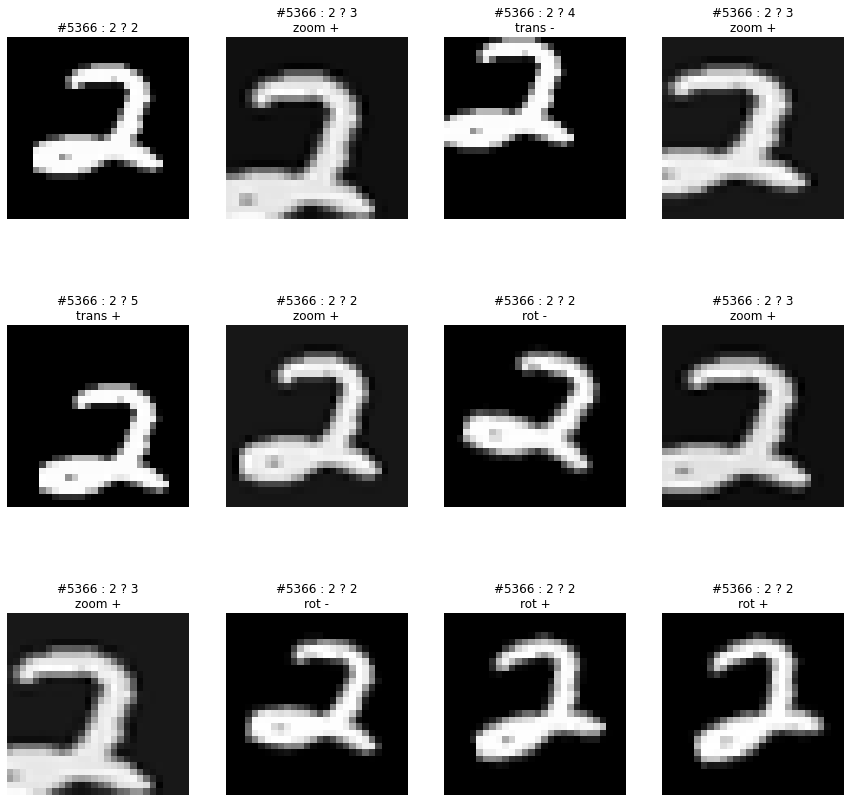

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
f = plt.figure(figsize=(15,15))
wish=np.random.randint(testX.shape[0])


#add noise

stacked_img=testX[wish].reshape(28,28,1)
#stacked_img = np.stack((trainX[wish].reshape(28,28),)*3,2).reshape((28,28,3))
predictions = new_model.predict(stacked_img.reshape(1,28,28,1))
ax = f.add_subplot(3,4,1)
ax.imshow(stacked_img.reshape(28,28), cmap=plt.get_cmap('gray'))
ax.axis("off")
ax.set_title('#'+str(wish)+" : "+str(np.argmax(testY[wish]))+" ? "+str(np.argmax(predictions)))

for i in range(2,13):
  ax = f.add_subplot(3,4,i)
  new_img,op=play_with_image(stacked_img)
  predictions = new_model.predict(new_img.reshape(1,28,28,1))
  ax.imshow(new_img.reshape(28,28), cmap=plt.get_cmap('gray'))
  ax.axis("off")
  ax.set_title('#'+str(wish)+" : "+str(np.argmax(testY[wish]))+" ? "+str(np.argmax(predictions))+'\n'+op)


Keras has an automatic class to make augmentation
[Preprocessing](https://keras.io/preprocessing/image/)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
vertical_flip=False)


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
data_aug.fit(testX)

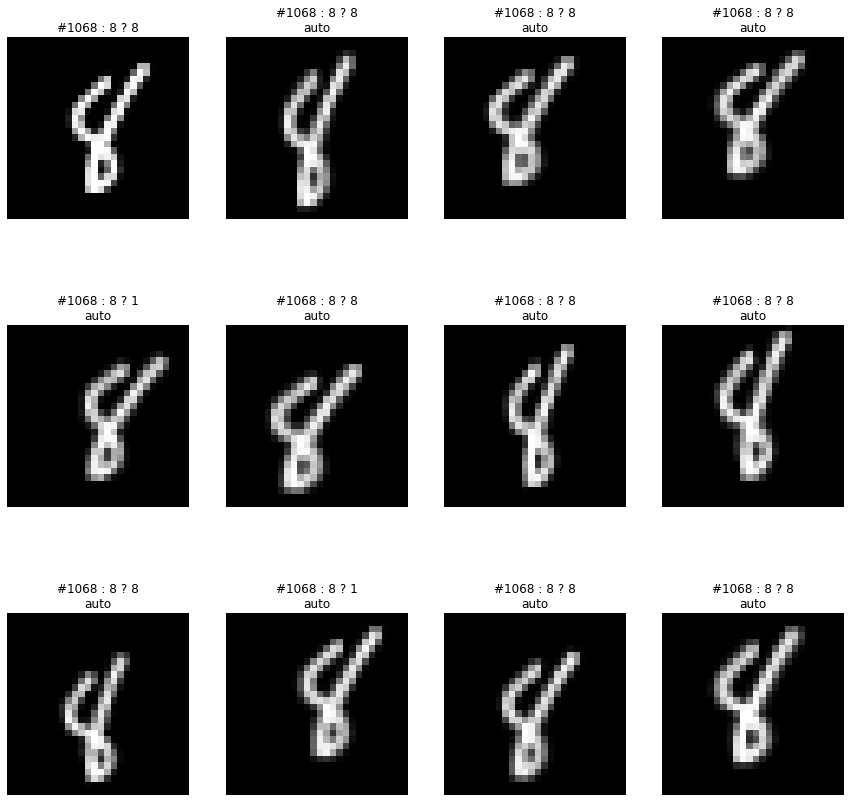

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np



f = plt.figure(figsize=(15,15))
wish=np.random.randint(testX.shape[0])



stacked_img=testX[wish].reshape(28,28,1)
#stacked_img = np.stack((trainX[wish].reshape(28,28),)*3,2).reshape((28,28,3))
predictions = new_model(stacked_img.reshape(1,28,28,1))
ax = f.add_subplot(3,4,1)
ax.imshow(stacked_img.reshape(28,28), cmap=plt.get_cmap('gray'))
ax.axis("off")
ax.set_title('#'+str(wish)+" : "+str(np.argmax(testY[wish]))+" ? "+str(np.argmax(predictions)))

for i in range(2,13):
  ax = f.add_subplot(3,4,i)
  op="auto"
  new_img=data_aug.random_transform(stacked_img)
  predictions = new_model(new_img.reshape(1,28,28,1))
  ax.imshow(new_img.reshape(28,28), cmap=plt.get_cmap('gray'))
  ax.axis("off")
  ax.set_title('#'+str(wish)+" : "+str(np.argmax(testY[wish]))+" ? "+str(np.argmax(predictions))+'\n'+op)


## Deployment

[GRADIO](https://www.gradio.app/) is a fastAPI, which has legal input and output interfaces for ML models, hello world example: 

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.7 MB 12.3 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 255 kB 55.9 MB/s 
     |████████████████████████████████| 211 kB 52.7 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 44.3 MB/s 
     |████████████████████████████████| 2.0 MB 43.1 MB/s 
     |████████████████████████████████| 84 kB 2.0 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 53.5 MB/s 
     |████████████████████████████████| 144 kB 55.3 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
     |████████████████████████████████| 10.9 MB 45.5 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 61 kB 382 kB/s 
     |████████████████████████████████| 856 kB 43.0 MB/s 
     |███████████████████████

Our exercise

In [ ]:
import gradio as gr

from tensorflow.keras.models import load_model

new_model=load_model('final_model.h5')


def recognize_digit(img): 
  # resize image to has the same input of trained model   
    new_img = cv2.resize(img/255.0,(28, 28), interpolation = cv2.INTER_CUBIC)
    
    predictions = new_model(new_img.reshape(1,28,28,1))
    #n=np.argmax(predictions) 
    # ... return dictionary of labels and confidences
    predictions=predictions.numpy().tolist()[0]
    return {str(i): predictions[i] for i in range(10)}

#wish=np.random.randint(testX.shape[0])
#stacked_img=testX[wish].reshape(28,28,1)
#print(recognize_digit(stacked_img),testY[wish])

im = gr.inputs.Image(shape=(28, 28), image_mode='L', invert_colors=True, source="canvas")

gr.Interface(fn=recognize_digit, inputs=im, outputs="label").launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://15574.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f1937052cd0>,
 'http://127.0.0.1:7860/',
 'https://15574.gradio.app')

In [ ]:
import requests
import tensorflow as tf

import gradio as gr

inception_net = tf.keras.applications.MobileNetV2()  # load the model

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")
def classify_image(inp):
    #print(inp.shape)
    #new_img = cv2.resize(inp,(224, 224,3), interpolation = cv2.INTER_CUBIC)
    inp = inp.reshape((-1, 224, 224, 3))
    inp = tf.keras.applications.mobilenet_v2.preprocess_input(inp)
    prediction = inception_net.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(224, 224), source="webcam")
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(
    fn=classify_image, inputs=image, outputs=label, interpretation="default"
).launch(debug=True)


14548992/14536120 [==============================] - 1s 0us/step
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Your interface requires microphone or webcam permissions - this may cause issues in Colab. Use the External URL in case of issues.
Running on public URL: https://51387.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f1937052cd0>,
 'http://127.0.0.1:7860/',
 'https://51387.gradio.app')